# 1.7 Network Graph Visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data
relationship_df = pd.read_csv(r'C:\Users\Usha Bharati\OneDrive\Desktop\CF-Achievement 1\20th-century\20th_century_relationship.csv')

In [3]:
relationship_df

,Unnamed: 0,source,target,value
0,0,France,Italy,10
1,1,Italy,Russia,6
2,2,Germany,Russia,26
3,3,Bulgaria,Germany,6
4,4,Bulgaria,Russia,5
...,...,...,...,...
75,75,Greece,Italy,3
76,76,Italy,Japan,6
77,77,Romania,Russia,6
78,78,India,Lebanon,1


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization- Networkx

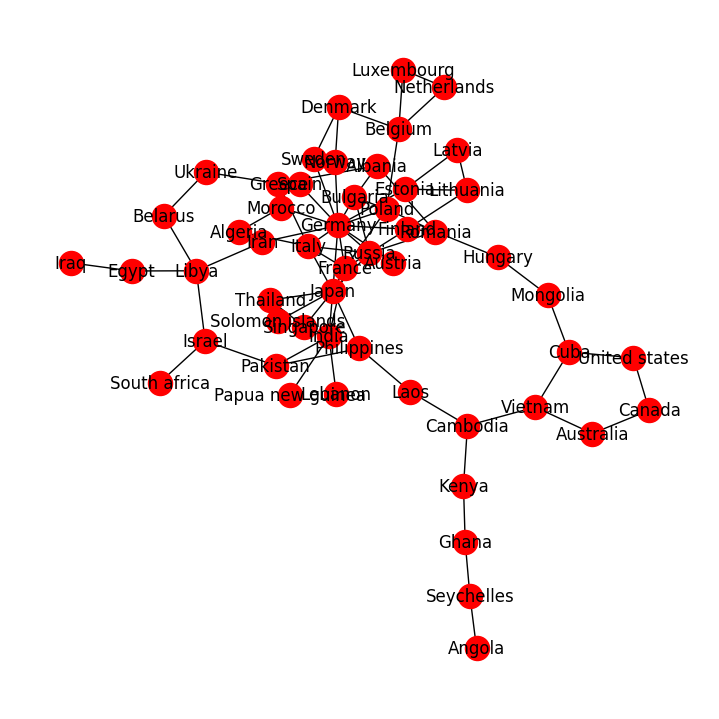

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_20th_century.png')

### Graph visualization - Pyvis

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection - Leiden algorithm

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com

defaultdict(list,
            {'France': [0],
             'Japan': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Philippines': [0],
             'Solomon islands': [0],
             'India': [0],
             'Pakistan': [0],
             'Papua new guinea': [0],
             'Lebanon': [0],
             'Greece': [1],
             'Ukraine': [1],
             'Belarus': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Israel': [1],
             'South africa': [1],
             'Iran': [1],
             'Italy': [2],
             'Germany': [2],
             'Austria': [2],
             'Spain': [2],
             'Denmark': [2],
             'Norway': [2],
             'Sweden': [2],
             'Morocco': [2],
             'Algeria': [2],
             'Hungary': [3],
             'Mongolia': [3],
             'Cuba': [3],
             'United states': [3],
             'Canada': [3],
             'A

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com

{'France': 0,
 'Japan': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Philippines': 0,
 'Solomon islands': 0,
 'India': 0,
 'Pakistan': 0,
 'Papua new guinea': 0,
 'Lebanon': 0,
 'Greece': 1,
 'Ukraine': 1,
 'Belarus': 1,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'Israel': 1,
 'South africa': 1,
 'Iran': 1,
 'Italy': 2,
 'Germany': 2,
 'Austria': 2,
 'Spain': 2,
 'Denmark': 2,
 'Norway': 2,
 'Sweden': 2,
 'Morocco': 2,
 'Algeria': 2,
 'Hungary': 3,
 'Mongolia': 3,
 'Cuba': 3,
 'United states': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Russia': 4,
 'Bulgaria': 4,
 'Poland': 4,
 'Finland': 4,
 'Albania': 4,
 'Romania': 4,
 'Laos': 5,
 'Cambodia': 5,
 'Kenya': 5,
 'Ghana': 5,
 'Seychelles': 5,
 'Angola': 5,
 'Belgium': 6,
 'Netherlands': 6,
 'Luxembourg': 6,
 'Estonia': 7,
 'Latvia': 7,
 'Lithuania': 7}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


##### The Leiden algorithm works by exploring modularity. It tries to maximize the difference between the expected and actual number of edges in a community. These edges are created by the frequency of interactions between the countries.
##### They would exhibit frequent communication, which would return in the end edge calculation, and they would likely end up in the same community. 
##### The blue group includes countries from Europe(Germany, France,Italy ), North Africa (Bulgaria, Morocco) taking centre stage. It is very much evident from history, given the World wars, colonies formed and trades as well and this is obvious from the thick blue line as edges between these countries. I think algorithm picked up this based on strong political and historical relations between them.
##### The yellow group consists of mostly asia. The strong yellow line between India and Pakistan shows the strenous history and colonialism during that period. Similarly, Japan, Singapre were strengtheing their economy.  That is the reason algorithm identifies these countries as a community.
##### The Green group includes Belgium, Netherlands, Luxembourg, Denmark, Norway, Sweden. I think algroithm grouped these countries because of their similar economic growth and regional pacts make them work in close cooperation.
##### The red group covers mostly the middel east. May be the effect of trade and other political history reflected significant modularity in their interactions.
##### The purple group covers countries- Laos, Cambodia, Kenya, Ghana, Seychelles, Angola. The strong modularity score, in this case may be the result of historical and colonial challenges,

### Centrality measures

### (a)Degree centrality

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11538461538461539,
 'Italy': 0.11538461538461539,
 'Russia': 0.13461538461538464,
 'Germany': 0.2692307692307693,
 'Bulgaria': 0.07692307692307693,
 'Austria': 0.019230769230769232,
 'Spain': 0.019230769230769232,
 'Poland': 0.09615384615384616,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Belgium': 0.07692307692307693,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Denmark': 0.057692307692307696,
 'Norway': 0.038461538461538464,
 'Sweden': 0.038461538461538464,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Japan': 0.17307692307692307,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

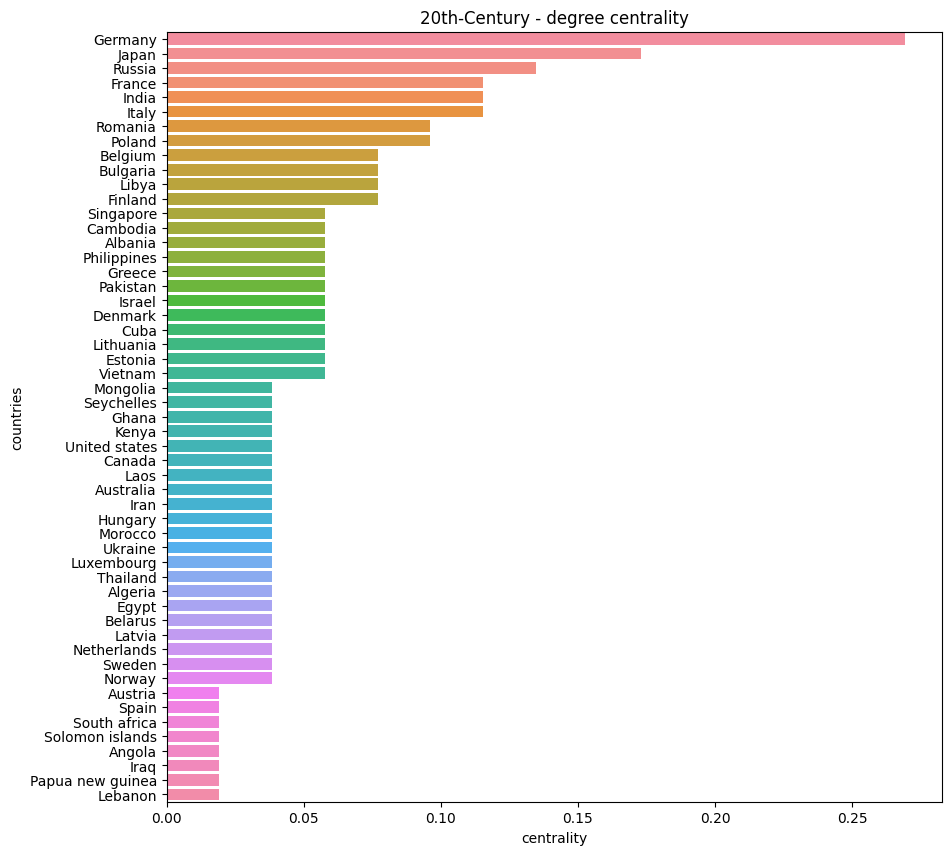

In [18]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th-Century - degree centrality")

#### The bar chart shows 'Germnay' with the highest degree of centrality, which is followed by Japan. This means that, these countries have most connections with other countries in 20th-century webpage.
#### This is understandable given the war situations and other political histories that these countries have. So, I think this degree of centrality gives a correct picture for the events in this period.

### (b)Closeness centrality

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [20]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

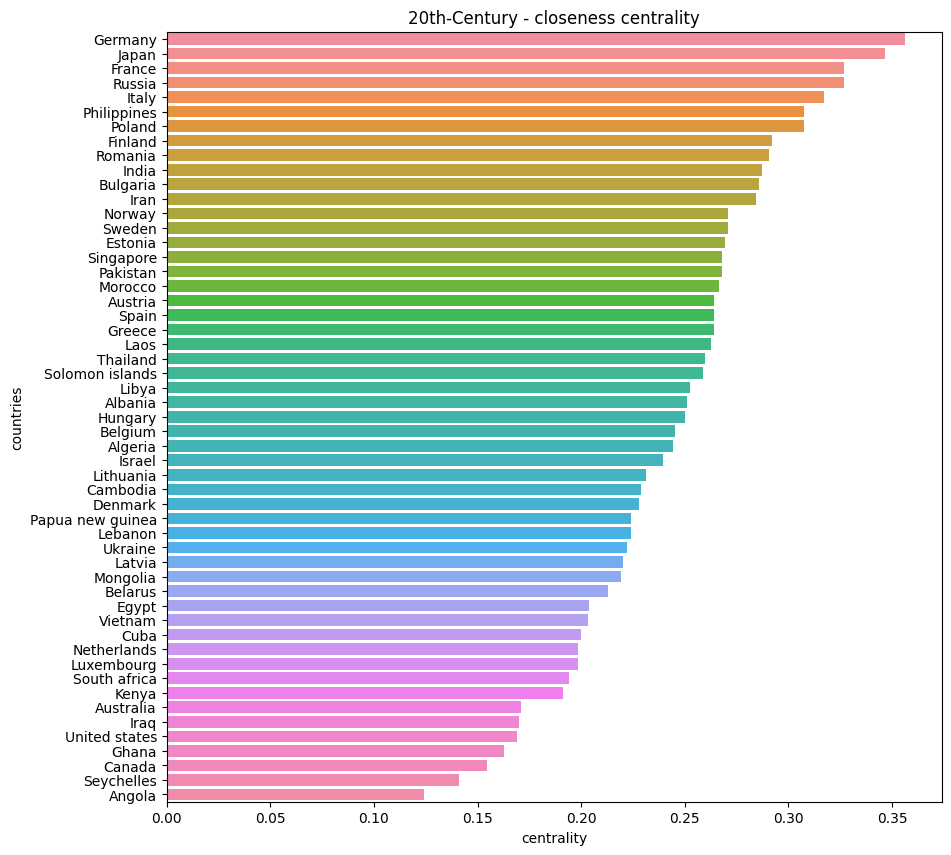

In [21]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th-Century - closeness centrality")

#### The result in closeness reality is very much similar to degree centrality, which is not surprising. However, the closeness scores are higher for all the countries, that can be due to the impact of the events in one part of the world on the other, it can be socio-economic,political etc.

### Betweenness centrality

In [22]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [23]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

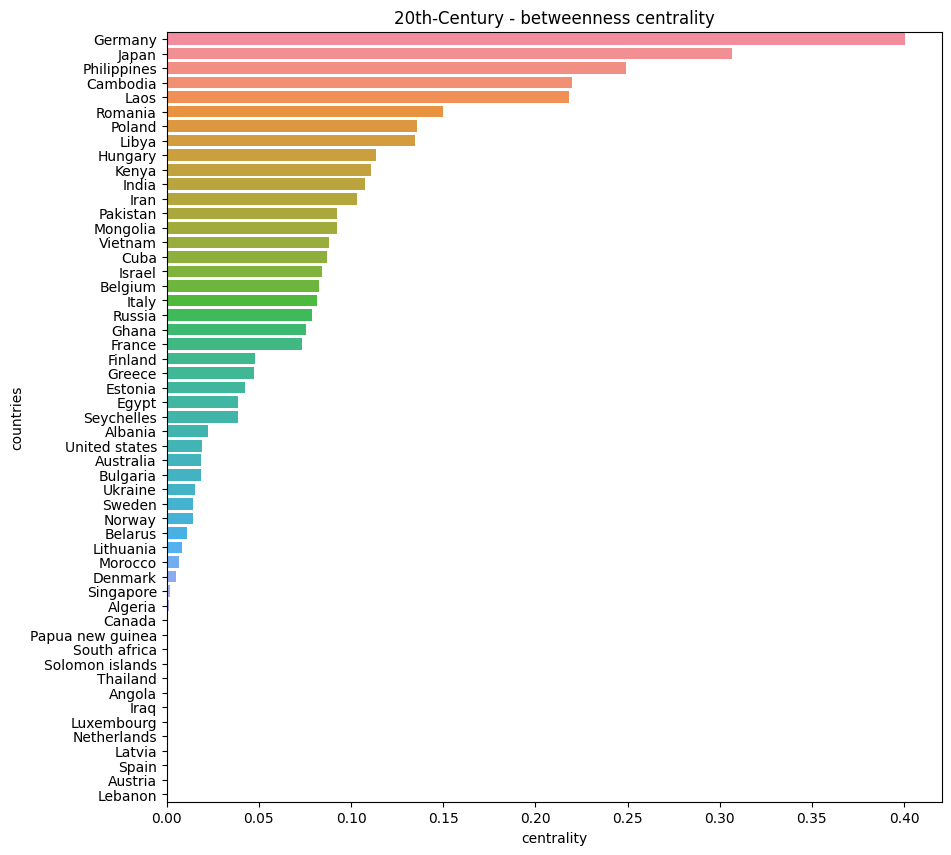

In [24]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th-Century - betweenness centrality")

#### The betweenness output reconfirms the closeness centrality score established—specifically, that the most ”influential” country is Germany, followed by the Japan. All the other countries score relatively low on this scale as is given by the events that took place in the said countries.

In [25]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')